In [37]:
from collections import defaultdict
import numpy as np
import pdb
import random
from sklearn.datasets import make_blobs
from itertools import combinations, product
from scipy.special import gamma
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform, euclidean
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm
from math import sqrt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score, confusion_matrix, silhouette_score, davies_bouldin_score
import seaborn as sn

In [38]:
class Lorentz:
    def __init__(self, s = 10, r = 28, b = 8/3):
        self.s = s
        self.r = r
        self.b = b

    #Differential equations of a Lorenz System
    def X(self, x, y, s):
        return s * (y - x)

    def Y(self, x, y, z, r):
        return (-x) * z + r * x - y

    def Z(self, x, y, z, b):
        return x * y - b * z

    #RK4 for the differential equations
    def RK4(self, x, y, z, s, r, b, dt):
        k_1 = self.X(x, y, s)
        l_1 = self.Y(x, y, z, r)
        m_1 = self.Z(x, y, z, b)

        k_2 = self.X((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), s)
        l_2 = self.Y((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), r)
        m_2 = self.Z((x + k_1 * dt * 0.5), (y + l_1 * dt * 0.5), (z + m_1 * dt * 0.5), b)

        k_3 = self.X((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), s)
        l_3 = self.Y((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), r)
        m_3 = self.Z((x + k_2 * dt * 0.5), (y + l_2 * dt * 0.5), (z + m_2 * dt * 0.5), b)

        k_4 = self.X((x + k_3 * dt), (y + l_3 * dt), s)
        l_4 = self.Y((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), r)
        m_4 = self.Z((x + k_3 * dt), (y + l_3 * dt), (z + m_3 * dt), b)

        x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * dt * (1/6)
        y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * dt * (1/6)
        z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * dt * (1/6)

        return (x, y, z)

    def generate(self, dt, steps):
        #Initial values and Parameters
        x_0, y_0, z_0 = 1, 1, 1

        #RK4 iteration
        x_list = [x_0]
        y_list = [y_0]
        z_list = [z_0]

        i = 0

        while i < steps:
            x = x_list[i]
            y = y_list[i]
            z = z_list[i]

            position = self.RK4(x, y, z, self.s, self.r, self.b, dt)

            x_list.append(position[0])
            y_list.append(position[1])
            z_list.append(position[2])

            i += 1

        x_array = np.array(x_list)
        y_array = np.array(y_list)
        z_array = np.array(z_list)

        return x_array, y_array, z_array

In [53]:
xs, _, _ = Lorentz().generate(0.1, 2000000)
xs = (xs - xs.min()) / (xs.max() - xs.min())

In [54]:
len(xs)

2000001

In [55]:
xs

array([0.52663585, 0.55941759, 0.67351699, ..., 0.15352773, 0.12721348,
       0.31634998])

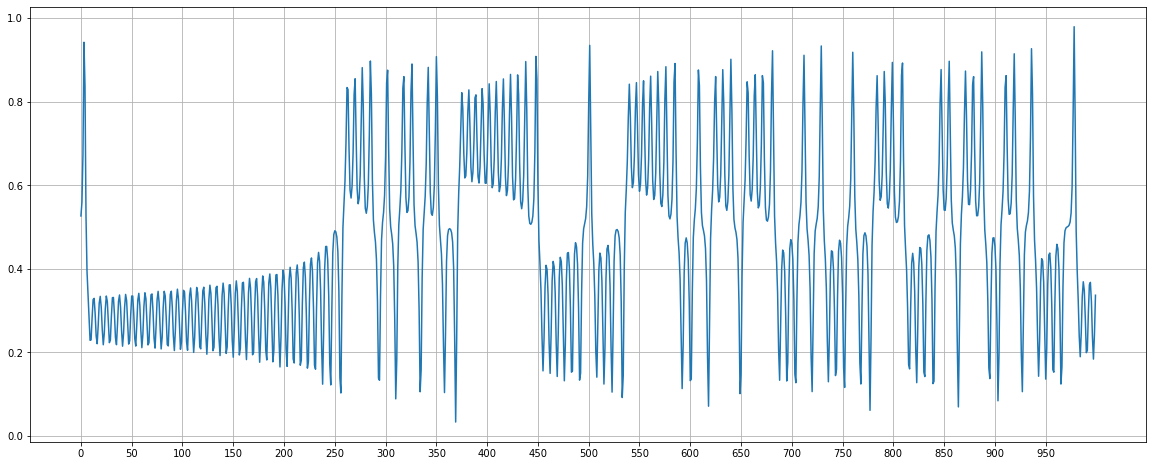

In [56]:
plt.figure(figsize=(20, 8))
plt.plot(xs[:1000])
plt.xticks([i for i in range(0, 1000, 50)])
plt.grid()
plt.show()

In [57]:
list_for_delete = []
for i in range(300):
    list_for_delete.append(i)

xs = np.delete(xs, list_for_delete)

xs_train = np.split(xs, [200000])[0]
xs_test = np.split(xs, [200000])[1]

In [67]:
pat_ua = []
for i in range(len(xs_train)):
    pat_ua.append([0,0,0])

pat_ua[0][0] = xs_train[0]
pat_ua[0][1] = xs_train[1]
pat_ua[1][0] = xs_train[1]
for i in range(2, len(xs_train)):
    pat_ua[i-2][2] = xs_train[i]
    pat_ua[i-1][1] = xs_train[i]
    pat_ua[i][0] = xs_train[i]

pat_ua.pop()
pat_ua.pop()

[0.8210463517537109, 0.8661598499555582, 0]

In [68]:
epsilon = 0.05

In [69]:
xs_test = xs[1000:]
len(xs_test)

1998701

# –≥—Ä–µ–±—ñ–Ω–µ—Üi

In [70]:
# —Ç—É—Ç —á–µ–∫–∞–µ–º —Ä–∞—Å—á–µ—Å–∫—É –ø–æ–¥—Ö–æ–¥–∏—Ç –∏–ª–∏ –Ω–µ—Ç 
# —É —Ä–∞—Å—á–µ—Å—Ç–∫–∏ (–≥—Ä–µ–±—ñ–Ω–µ—Ü—å) –≤—ã—Ç–∫–Ω—É—Ç –ø–µ—Ä–≤—ã–π ü¶∑ 
def predict_ua1(shablon, epsilon, x2, x3):
    if abs(shablon[1] - x2) < epsilon and abs(shablon[2] - x3) < epsilon:
        return shablon[0]
    return False

# —É —Ä–∞—Å—á–µ—Å—Ç–∫–∏ –≤—ã—Ç–∫–Ω—É—Ç –≤—Ç–æ—Ä–æ–π ü¶∑ 
def predict_ua2(shablon, epsilon, x1, x3):
    if abs(shablon[0] - x1) < epsilon and abs(shablon[2] - x3) < epsilon:
        return shablon[1]
    return False

# —É —Ä–∞—Å—á–µ—Å—Ç–∫–∏ –≤—ã—Ç–∫–Ω—É—Ç —Ç—Ä–µ—Ç–∏–π ü¶∑
def predict_ua3(shablon, epsilon, x1, x2):
    if abs(shablon[0] - x1) < epsilon and abs(shablon[1] - x2) < epsilon:
        return shablon[2]
    return False

In [ ]:
i = 0
massiv_prognoz = []
for x in xs_test:
    x_possible = []
    x_new = 0
    # —Ç–∏–ø–∞ –ø–µ—Ä–≤—ã–π —ç–ª–µ–º–µ–Ω—Ç
    if i == 0:
        for j in pat_ua:
            pos = predict_ua1(j, epsilon, xs_test[i + 1], xs_test[i + 2])
            if not pos:
                x_possible.append(pos)
        x_new = sum(x_possible) / len(x_possible)
    # —Ç–∏–ø–∞ –≤—Ç–æ—Ä–æ–π —ç–ª–µ–º–µ–Ω—Ç
    elif i == 1:
        for j in pat_ua:
            pos = predict_ua1(j, epsilon, xs_test[i + 1], xs_test[i + 2])
            if not pos:
                x_possible.append(pos)
        for j in pat_ua:
            pos = predict_ua2(j, epsilon, xs_test[i - 1], xs_test[i + 1])
            if not pos:
                x_possible.append(pos)
        x_new = sum(x_possible) / len(x_possible)
    
    # –ø—Ä–µ–¥–ø–æ—Å–ª–µ–¥–Ω–∏–π
    elif i == len(xs_test) - 2:
        for j in pat_ua:
            pos = predict_ua2(j, epsilon, xs_test[i - 1], xs_test[i + 1])
            if not pos:
                x_possible.append(pos)
        for j in pat_ua:
            pos = predict_ua3(j, epsilon, xs_test[i - 2], xs_test[i - 1])
            if not pos:
                x_possible.append(pos)
        x_new = sum(x_possible) / len(x_possible)
    
    # –ø–æ—Å–ª–µ–¥–Ω–∏–π —ç–ª–µ–º–µ–Ω—Ç
    elif i == len(xs_test) - 1:
        for j in pat_ua:
            pos = predict_ua3(j, epsilon, xs_test[i - 2], xs_test[i - 1])
            if not pos:
                x_possible.append(pos)
        x_new = sum(x_possible) / len(x_possible)
    
    # –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω—ã–µ
    else:
        for j in pat_ua:
            pos = predict_ua1(j, epsilon, xs_test[i + 1], xs_test[i + 2])
            if not pos:
                x_possible.append(pos)
        for j in pat_ua:
            pos = predict_ua2(j, epsilon, xs_test[i - 1], xs_test[i + 1])
            if not pos:
                x_possible.append(pos)
        for j in pat_ua:
            pos = predict_ua3(j, epsilon, xs_test[i - 2], xs_test[i - 1])
            if not pos:
                x_possible.append(pos)
        x_new = sum(x_possible) / len(x_possible)
    if len(x_possible) == 0:
        x_new = x
    massiv_prognoz.append(x_new)
    i += 1

In [ ]:
massiv_prognoz

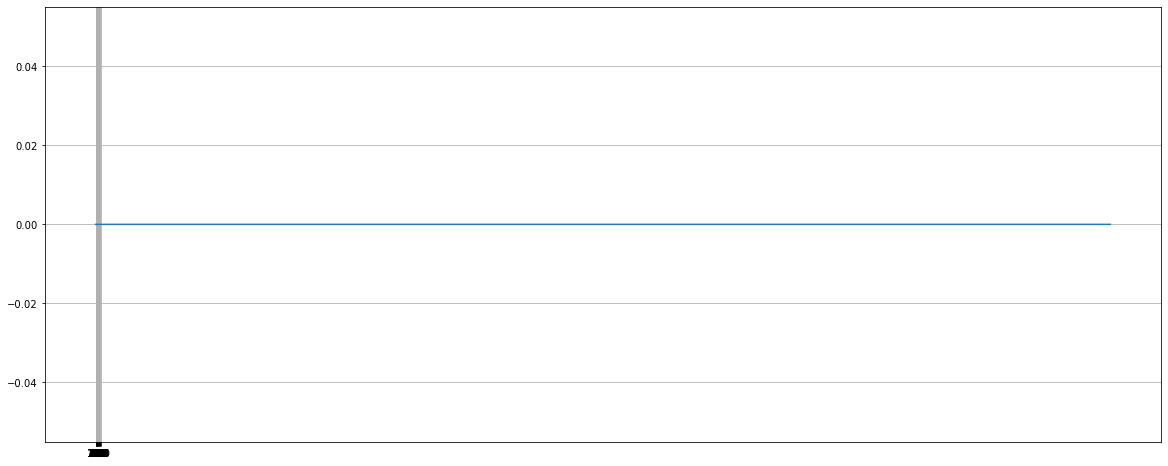

In [51]:
plt.figure(figsize=(20, 8))
plt.plot(massiv_prognoz)
plt.xticks([i for i in range(0, 1000, 50)])
plt.grid()
plt.show()